In [1]:
import commonfunctions as cf
from skimage.color import rgba2rgb
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def count_rows(image):
    
    
    image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    ret,inverted_image = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    # TODO remove after integrating prepsocessing

    
    h = image.shape[0]
    w = image.shape[1]
    h = cf.math.ceil(h *0.01)
    
    #the structure element used
    se = np.ones(shape = (h,w//5))
    # dilated = cv2.morphologyEx(inverted_image, cv2.MORPH_CLOSE, kernel = se)
    dilated = cv2.dilate(inverted_image,kernel=se)
    cf.io.imshow(dilated)
    
    
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = list(filter(lambda cnt: cv2.contourArea(cnt,True) < 0 , contours)) 
    contours_list = [(x,y,w,h) for x,y,w,h in [cv2.boundingRect(c) for c in contours]]
    contours_list = sorted(contours_list, key=lambda ctr: ctr[1])

    rows = []
    
    for ind,(x,y,w,h) in enumerate(contours_list):
        rows.append(image[y:y+h, x:x+w])
        
    print(len(rows))
    cf.show_images(rows)
    return dilated,len(contours),rows



5


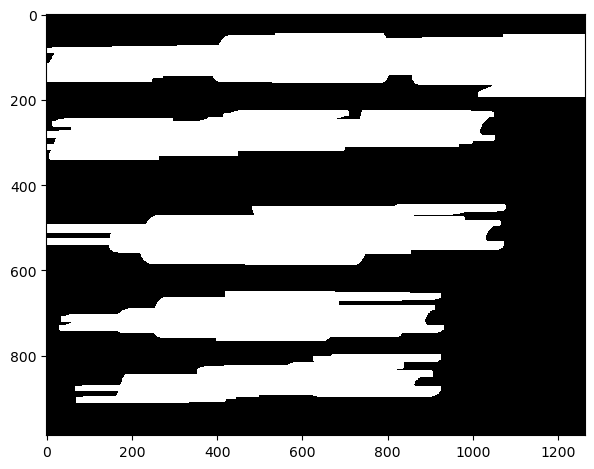

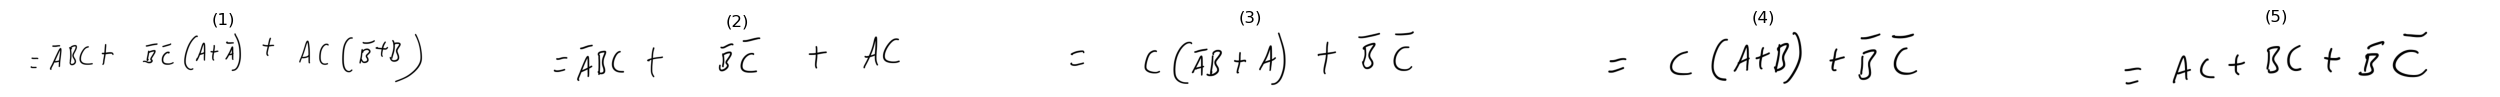

1


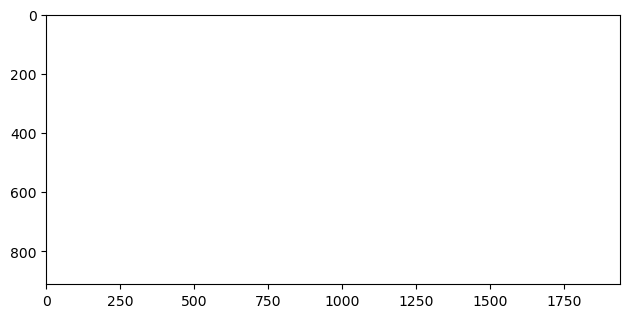

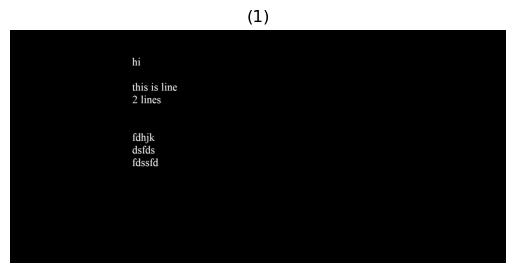

1


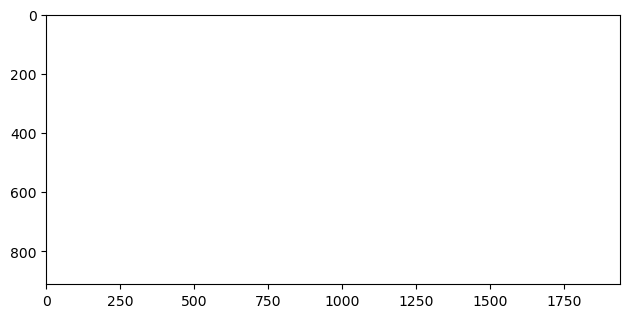

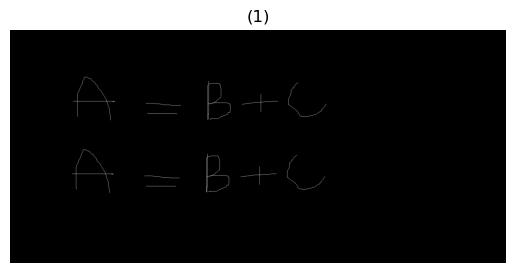

In [8]:
img1 = cf.io.imread('./test_images/2.png')
img2 = cf.io.imread('./test_images/handwritten.png') 
img3 = cf.io.imread('./test_images/6_lines.png') 
img4 = cf.io.imread('./test_images/3_separate_lines.png') 


# result1,len1 = count_rows(img1)
result2,len2,ret = count_rows(img2)
# result3,len3,ret = count_rows(img3)
# result4,len4,ret = count_rows(img4)

